# NLP pour l’analyse de critiques de films

In [1]:
import pandas as pd

## Etape 1 : Web Scraping des données d’avis de spectacteurs

**Ici on récupère sous forme de dataframe l'ensemble des notes et avis de chaque films**

In [2]:
from Appli_WebScraping import get_webscrapping_avis

nom_film1 = "inception"
url1 = 'http://www.allocine.fr/film/fichefilm-143692/critiques/spectateurs/'
# Nombre de page à lire pour le 1er film
nbPages1 = 477
chemin1 = f'./films/allocine_{nom_film1}_avis.csv'

nom_film2 = "sonic2"
url2 = 'https://www.allocine.fr/film/fichefilm-281203/critiques/spectateurs/'
# Nombre de page à lire pour le 2nd film
nbPages2 = 8
chemin2 = f'./films/allocine_{nom_film2}_avis.csv'

# URI-SUFFIX
uri_pages = '?page='

- Critique du film **Inception** sur Allociné https://www.allocine.fr/film/fichefilm-143692/critiques/spectateurs/

In [3]:
from Appli_WebScraping import get_webscrapping_avis
get_webscrapping_avis(url1, uri_pages, nbPages1, chemin1)

'./films/allocine_inception_avis.csv'

In [3]:
# Import du dataset Inception
df_inception = pd.read_csv(chemin1)
df_inception.head(3)

,Note,Description
0,"5,0",Après le chef d'oeuvre super-héroïque The Dark...
1,"5,0",C’est fou ce qu’on aime détester Christopher N...
2,"5,0",CHEF D’ŒUVRE ! Le film est absolument parfait ...


- Critique du film **Sonic 2** sur Allociné https://www.allocine.fr/film/fichefilm-281203/critiques/spectateurs/

In [4]:
from Appli_WebScraping import get_webscrapping_avis
get_webscrapping_avis(url2, uri_pages, nbPages2, chemin2)

'./films/allocine_sonic2_avis.csv'

In [4]:
# Import du dataset Sonic2
df_sonic2 = pd.read_csv(chemin2)
df_sonic2.head(3)

,Note,Description
0,"4,0",une bonne suite pour les aventures de sonic au...
1,"5,0",Cette suite de sonic est incroyable !Le fan qu...
2,"3,0",Malgré deux nouveaux personnages de l'univers ...


## Etape 2 : Préparation des données

### 1) Des expressions régulières pour retirer les bruits (ponctuation, etc.) des commentaires.

- **Vérification des données et Fusion des 2 dataframes**

In [5]:
df_inception.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7153 entries, 0 to 7152
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Note         7153 non-null   object
 1   Description  7152 non-null   object
dtypes: object(2)
memory usage: 111.9+ KB


In [6]:
df_inception = df_inception.dropna(axis=0)
df_inception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7152 entries, 0 to 7152
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Note         7152 non-null   object
 1   Description  7152 non-null   object
dtypes: object(2)
memory usage: 167.6+ KB


In [7]:
df_sonic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Note         108 non-null    object
 1   Description  108 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [8]:
df = pd.concat([df_inception, df_sonic2], ignore_index=True)
df

,Note,Description
0,"5,0",Après le chef d'oeuvre super-héroïque The Dark...
1,"5,0",C’est fou ce qu’on aime détester Christopher N...
2,"5,0",CHEF D’ŒUVRE ! Le film est absolument parfait ...
3,"5,0","Un film aussi novateur que complexe, dont la m..."
4,"3,5",Le meilleur blockbuster de 2010 a pour thème l...
...,...,...
7255,"5,0",Le film est trop bien la qualité du film est s...
7256,"5,0",Film pas mal mais trop long..Un bon film à voi...
7257,"4,0",Excellent film à voir petit comme grand. J’ai ...
7258,"5,0","Fan de Sonic depuis tout petit, j'adorais cour..."


- **pré-traitement des avis : on retire les bruits (ponctuation, etc.) des commentaires**

In [9]:
import re
import unidecode

CARACTERE_SPE = re.compile(r"(<br\s/><br\s/>)|(-)|(/)|[.’']|[,;:!?$€()|><^*%\"\\\[\]]")
SUPP_ESPACES = re.compile(r"\s\s+")
PUR_NOMBRE = re.compile("[0-9]")

def preprocess(txt):
    txt = [line.replace('\n', ' ')  for line in txt] # Retire les \n (retours chariots)
    txt = [PUR_NOMBRE.sub("", line.lower()) for line in txt] # retire les nomre (comme les années)
    txt = [CARACTERE_SPE.sub(" ", line) for line in txt]
    txt = [SUPP_ESPACES.sub(" ", line) for line in txt]
    return txt

df['Description_nlp'] = pd.DataFrame(preprocess(df['Description']))
df


,Note,Description,Description_nlp
0,"5,0",Après le chef d'oeuvre super-héroïque The Dark...,après le chef d oeuvre super héroïque the dark...
1,"5,0",C’est fou ce qu’on aime détester Christopher N...,c est fou ce qu on aime détester christopher n...
2,"5,0",CHEF D’ŒUVRE ! Le film est absolument parfait ...,chef d œuvre le film est absolument parfait le...
3,"5,0","Un film aussi novateur que complexe, dont la m...",un film aussi novateur que complexe dont la mi...
4,"3,5",Le meilleur blockbuster de 2010 a pour thème l...,le meilleur blockbuster de a pour thème la dél...
...,...,...,...
7255,"5,0",Le film est trop bien la qualité du film est s...,le film est trop bien la qualité du film est s...
7256,"5,0",Film pas mal mais trop long..Un bon film à voi...,film pas mal mais trop long un bon film à voir...
7257,"4,0",Excellent film à voir petit comme grand. J’ai ...,excellent film à voir petit comme grand j ai t...
7258,"5,0","Fan de Sonic depuis tout petit, j'adorais cour...",fan de sonic depuis tout petit j adorais couri...


In [10]:
# Visualisation du traitement sur 1 avis
texte2 = df.iloc[0,2]
len(texte2), texte2

(1839,
 'après le chef d oeuvre super héroïque the dark knight christopher nolan a carte blanche pour réaliser son prochain long métrage il se met alors à la réalisation d un film co écrit avec son frère et qui a pour nom inception le récit mélange la réalité et le rêve le spectateur se méprend alors puis apprend à discerner le vrai du faux à trouver les clés du scénario inception est un chef d oeuvre un véritable chef d oeuvre christopher nolan illustre son talent de par sa réalisation et son scénario intelligence pure ce dernier se révèle complexe à première vue puis au long du visionnage l on se rend peu à peu compte de sa force de sa puissance émotionnelle de sa capacité à brouiller les pistes celles ci sont également éparpillées grâce à une mise en scène incroyable osant le grandiose et l intime inception peut s avérer être un blockbuster ultra visuel mais également un drame prenant puisque l intrigue principale est finalement le deuil pour parfaire cette grande production nolan a

### 2) NLP pour tokeniser et réduire le corpus de chaque commentaire (afin par exemple de ne garder que les mots importants via les stopwords)

#### - traitement par soptword

In [11]:
import nltk
#à installer la 1ere fois, est l'instal dans l'environnement
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

french_stopwords = set(stopwords.words('french'))
print(len(french_stopwords), sorted(french_stopwords))

157 ['ai', 'aie', 'aient', 'aies', 'ait', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'c', 'ce', 'ces', 'd', 'dans', 'de', 'des', 'du', 'elle', 'en', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'il', 'ils', 'j', 'je', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'mon', 'même', 'n', 'ne', 'nos', 'notre', 'nous', 'on', 'ont', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 's', 'sa', 'se', 'sera', 'serai', 'seraient', 'serais', 'serait', 'seras', 'serez', 'seriez', 'serions', 'serons', 'seront', 'ses', 'soient', 'sois', 'soit', 'sommes', 'son'

In [12]:
# Ajout de stopwords
s=set(['a', 'à', 'cet', 'cette', 'cettes', 'après', 'tôt'])
french_stopwords=french_stopwords.union(s)
len(french_stopwords)

163

- **Suppression des stopwords dans les avis en créant une nouvelle colonne**

In [13]:
#word_tokens2 = word_tokenize(df_sonic2.iloc[0,1])
#word_tokens2
ftoken = lambda x: [word.lower() for word in word_tokenize(x) if word not in (french_stopwords)]
df["Description_nlp"] = df["Description_nlp"].apply(ftoken)
df.head()

,Note,Description,Description_nlp
0,"5,0",Après le chef d'oeuvre super-héroïque The Dark...,"[chef, oeuvre, super, héroïque, the, dark, kni..."
1,"5,0",C’est fou ce qu’on aime détester Christopher N...,"[fou, aime, détester, christopher, nolan…plus,..."
2,"5,0",CHEF D’ŒUVRE ! Le film est absolument parfait ...,"[chef, œuvre, film, absolument, parfait, acteu..."
3,"5,0","Un film aussi novateur que complexe, dont la m...","[film, aussi, novateur, complexe, dont, mise, ..."
4,"3,5",Le meilleur blockbuster de 2010 a pour thème l...,"[meilleur, blockbuster, thème, délicate, diffé..."


In [14]:
texte = df.iloc[7251,1]
print(len(texte), texte)

179 Le film 🎥 et juste incroyable j ai passé un excellent moment j ai pas vu les 2h de film. Il y a tout dans cette suite action. Humour. Aventure. Le scénario et top. Vivement le 3 😁


In [15]:
texte = df.iloc[7251,2]
print(len(texte), texte)

19 ['film', '🎥', 'juste', 'incroyable', 'passé', 'excellent', 'moment', 'vu', 'h', 'film', 'tout', 'suite', 'action', 'humour', 'aventure', 'scénario', 'top', 'vivement', '😁']


#### - "Racinisation" ou Stemming
(nota : pas de lemmatisation parce qu'il n'existe pas de fonction de lemmatisation de corpus français dans NLTK)

In [16]:
# "Racinisation" ou Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')
f = lambda x: ' '.join([stemmer.stem(word) for word in x])
df["Description_stem"] = df["Description_nlp"].apply(f)
df.head()

,Note,Description,Description_nlp,Description_stem
0,"5,0",Après le chef d'oeuvre super-héroïque The Dark...,"[chef, oeuvre, super, héroïque, the, dark, kni...",chef oeuvr sup héroïqu the dark knight christo...
1,"5,0",C’est fou ce qu’on aime détester Christopher N...,"[fou, aime, détester, christopher, nolan…plus,...",fou aim détest christoph nolan…plus film sorte...
2,"5,0",CHEF D’ŒUVRE ! Le film est absolument parfait ...,"[chef, œuvre, film, absolument, parfait, acteu...",chef œuvr film absolu parf acteur tous excelle...
3,"5,0","Un film aussi novateur que complexe, dont la m...","[film, aussi, novateur, complexe, dont, mise, ...",film auss novateur complex dont mis scen touch...
4,"3,5",Le meilleur blockbuster de 2010 a pour thème l...,"[meilleur, blockbuster, thème, délicate, diffé...",meilleur blockbust them délicat différenci ent...


In [17]:
texte = df.iloc[7241,3]
print(len(texte), texte)

130 excellent second film encor meilleur premi tant fan sonic ador multitud émot tout long ennui seul second film voir vo selon cepend


#### - Suppression des accents et des emoticon

In [18]:
#supprime les accents et les emoticon
import unidecode
f2 = lambda x: ' '.join(filter(None,unidecode.unidecode(x).split(' ')))

df["Description_stem"] = df["Description_stem"].apply(f2)
df.head()

,Note,Description,Description_nlp,Description_stem
0,"5,0",Après le chef d'oeuvre super-héroïque The Dark...,"[chef, oeuvre, super, héroïque, the, dark, kni...",chef oeuvr sup heroiqu the dark knight christo...
1,"5,0",C’est fou ce qu’on aime détester Christopher N...,"[fou, aime, détester, christopher, nolan…plus,...",fou aim detest christoph nolan...plus film sor...
2,"5,0",CHEF D’ŒUVRE ! Le film est absolument parfait ...,"[chef, œuvre, film, absolument, parfait, acteu...",chef oeuvr film absolu parf acteur tous excell...
3,"5,0","Un film aussi novateur que complexe, dont la m...","[film, aussi, novateur, complexe, dont, mise, ...",film auss novateur complex dont mis scen touch...
4,"3,5",Le meilleur blockbuster de 2010 a pour thème l...,"[meilleur, blockbuster, thème, délicate, diffé...",meilleur blockbust them delicat differenci ent...


In [19]:
texte = df.iloc[7241,3]
print(len(texte), texte)

130 excellent second film encor meilleur premi tant fan sonic ador multitud emot tout long ennui seul second film voir vo selon cepend


## Etape 3 : Préparation des libellés

In [20]:
df["Note"]= df["Note"].str.replace(",",".").astype(float)
df.head()

,Note,Description,Description_nlp,Description_stem
0,5.0,Après le chef d'oeuvre super-héroïque The Dark...,"[chef, oeuvre, super, héroïque, the, dark, kni...",chef oeuvr sup heroiqu the dark knight christo...
1,5.0,C’est fou ce qu’on aime détester Christopher N...,"[fou, aime, détester, christopher, nolan…plus,...",fou aim detest christoph nolan...plus film sor...
2,5.0,CHEF D’ŒUVRE ! Le film est absolument parfait ...,"[chef, œuvre, film, absolument, parfait, acteu...",chef oeuvr film absolu parf acteur tous excell...
3,5.0,"Un film aussi novateur que complexe, dont la m...","[film, aussi, novateur, complexe, dont, mise, ...",film auss novateur complex dont mis scen touch...
4,3.5,Le meilleur blockbuster de 2010 a pour thème l...,"[meilleur, blockbuster, thème, délicate, diffé...",meilleur blockbust them delicat differenci ent...


In [21]:
# avis positif : 1, avis négatif : 2
f = lambda x: 1 if x>2.5 else 0
df['Note'] = df['Note'].map(f)
df.head()

,Note,Description,Description_nlp,Description_stem
0,1,Après le chef d'oeuvre super-héroïque The Dark...,"[chef, oeuvre, super, héroïque, the, dark, kni...",chef oeuvr sup heroiqu the dark knight christo...
1,1,C’est fou ce qu’on aime détester Christopher N...,"[fou, aime, détester, christopher, nolan…plus,...",fou aim detest christoph nolan...plus film sor...
2,1,CHEF D’ŒUVRE ! Le film est absolument parfait ...,"[chef, œuvre, film, absolument, parfait, acteu...",chef oeuvr film absolu parf acteur tous excell...
3,1,"Un film aussi novateur que complexe, dont la m...","[film, aussi, novateur, complexe, dont, mise, ...",film auss novateur complex dont mis scen touch...
4,1,Le meilleur blockbuster de 2010 a pour thème l...,"[meilleur, blockbuster, thème, délicate, diffé...",meilleur blockbust them delicat differenci ent...


In [22]:
df['Note'].value_counts()

1    6171
0    1089
Name: Note, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Note              7260 non-null   int64 
 1   Description       7260 non-null   object
 2   Description_nlp   7260 non-null   object
 3   Description_stem  7260 non-null   object
dtypes: int64(1), object(3)
memory usage: 227.0+ KB


- **Séparation du dataset**

In [24]:
X = df[['Description_stem']]
X.head()

,Description_stem
0,chef oeuvr sup heroiqu the dark knight christo...
1,fou aim detest christoph nolan...plus film sor...
2,chef oeuvr film absolu parf acteur tous excell...
3,film auss novateur complex dont mis scen touch...
4,meilleur blockbust them delicat differenci ent...


In [25]:
y = df[['Note']]
y.head()

,Note
0,1
1,1
2,1
3,1
4,1


## Etape 2 (suite) :

### 3) Bag of word : Des sacs de mots afin de « transformer » nos mots en nombres qui pourront alors être exploités dans un algorithme de Machine learning


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5808, 1), (5808, 1), (1452, 1), (1452, 1))

- **Bag of words** : avec nltk.FreqDist, puis CountVectorizer

In [27]:
# je crée une liste de mot séparer pour nltk.FreqDist
BW = []
for ligne in X_train["Description_stem"]:
    BW.extend(ligne.split(' '))
print('nombre de mot dans le sac de mot = ',len(BW))
# Voir la fréquence du mot "film"
print('fréquence du mot film =',len(re.findall(r"film",' '.join(BW))))

nombre de mot dans le sac de mot =  243621
fréquence du mot film = 10032


In [28]:
# Fréquence de distribution des valeurs
fd = nltk.FreqDist(BW) 
most_common_element = fd.most_common()

# taille du nb de tuple des plus utilisé, je regarde le 1er élément
print('nombre de mots=',len(most_common_element),
      '\nmot le plus fréquent = ',most_common_element[0])

# je recréer un liste des mots apparaissant plus de 20x, soit 1352, pour comparer avec CountVectorizer
liste = [x for x in fd if fd[x] > 20]
print('nombre de mots apparaissant au min 20x = ',len(liste))        

nombre de mots= 9817 
mot le plus fréquent =  ('film', 9988)
nombre de mots apparaissant au min 20x =  1356


In [29]:
# 2e approche avec CountVectorizer, qui va garder les valeurs les plus féquentes
# Je crée un liste de phrase
sm = [ligne for ligne in X_train["Description_stem"]]
print('longeur de la liste = ',len(sm))

longeur de la liste =  5808


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
# Pour créer un Count Vectorizer, il suffit d'en instancier un.
# Il existe des paramètres spéciaux que nous pouvons définir ici lors de la création du vectoriseur, mais pour l'exemple le plus basique, ce n'est pas nécessaire.
vectorizer = CountVectorizer(min_df=20)
count_vector = vectorizer.fit(sm)
print('nombre de mots apparaissant au min 20x = ', len(count_vector.vocabulary_))
# j'obtient une liste de 1349 mots utilisé au minimum 20x, léger écart de 3 avec l'autre méthode

# !! sort un dictionnaire de position dans la liste du mot, pas sa frequence
#print(count_vector.vocabulary_)

nombre de mots apparaissant au min 20x =  1350


## Etape 4 : Finalisation de nos jeux de données

In [31]:
X_train_vec = vectorizer.transform(X_train['Description_stem']).toarray()
X_train_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
dfX_train_vec = pd.DataFrame(X_train_vec, index = X_train['Description_stem'].index.values, columns = vectorizer.get_feature_names_out())
dfX_train_vec

,abord,about,absolu,accept,accessibl,accompagn,accord,accroch,acteur,action,...,vont,voul,vouloir,voulu,voyag,vrai,vu,watanab,yeux,zimm
4189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4627,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_test_vec = vectorizer.transform(X_test['Description_stem']).toarray()
X_test_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
# fusion du jeu d'entrainement pour le WordCloud
df_wc = pd.concat([X_train, y_train], axis = 1)
df_wc0 = df_wc[df_wc.Note.eq(0)]
df_wc1 = df_wc[df_wc.Note.eq(1)]

- **Word Cloud sur les avis négatifs**

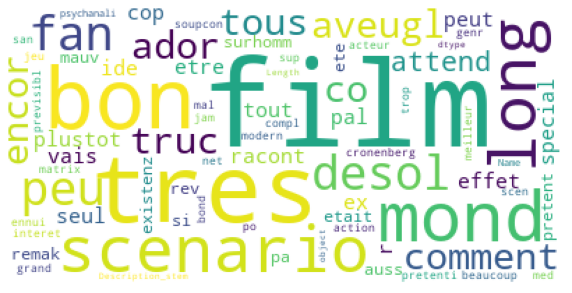

In [35]:
# Word Cloud Négatif
# Visualisation graphique en nuage de mots des 100 termes les plus utilisés, avec WordCloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
WC=WordCloud(background_color = 'white',
             stopwords = french_stopwords,
             max_words = 100).generate(str(df_wc0['Description_stem']))

print(WC)
plt.imshow(WC)
plt.axis("off")
plt.show()

- **Word Cloud sur les avis positifs**

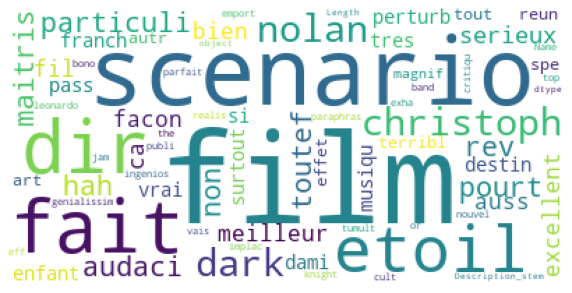

In [36]:
# Word Cloud sur les  Positif
# Visualisation graphique en nuage de mots des 100 termes les plus utilisés, avec WordCloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
WC=WordCloud(background_color = 'white',
             stopwords = french_stopwords,
             max_words = 100).generate(str(df_wc1['Description_stem']))

print(WC)
plt.imshow(WC)
plt.axis("off")
plt.show()

## Etape 5 : Entraînement du modèle

In [37]:
# redimensionnement des targets pour la régression logistique
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
y_train.shape, y_test.shape

((5808,), (1452,))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Trouve le meilleur hyperparametre c (régularisation)
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c,solver='liblinear', random_state=0, max_iter=150)
    lr.fit(X_train_vec, y_train)
    y_pred_test = lr.predict(X_test_vec)
    print ("Précision pour C=%s: %s" % (c, round(accuracy_score(y_test, y_pred_test),4)))

Précision pour C=0.01: 0.8815
Précision pour C=0.05: 0.9098
Précision pour C=0.25: 0.9242
Précision pour C=0.5: 0.9236
Précision pour C=1: 0.9208


In [39]:
# Créer votre modèle de régression logistique et entraînez le sur les données d'entraînement
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.25,solver='liblinear', random_state=0, max_iter=15)
# entrainement du model
logreg.fit(X_train_vec, y_train)
# Predire les résultats du modèle sur l'ensemble du test
y_pred_test = logreg.predict(X_test_vec)
print(y_pred_test)
print(y_test)

[1 1 1 ... 0 1 1]
[1 1 1 ... 1 1 1]


In [40]:
import numpy as np
# Calculer la probabilité que l'avis est positif ou negatif en utilisant la fonction predict_proba sur le jeu de test
y_test_proba = np.round_(logreg.predict_proba(X_test_vec),3)
# Affichage des probabilité des avis
proba = pd.DataFrame(y_test_proba)
proba

,0,1
0,0.061,0.939
1,0.005,0.995
2,0.438,0.562
3,0.029,0.971
4,0.159,0.841
...,...,...
1447,0.035,0.965
1448,0.016,0.984
1449,0.869,0.131
1450,0.008,0.992


## Etape 6 : Analyse des résultats

In [41]:
# Afficher l'accuracy score en utilisant la fonction accuracy_score sur le jeu de test
from sklearn.metrics import accuracy_score

print('Model accuracy score: ',accuracy_score(y_test, y_pred_test))

Model accuracy score:  0.9242424242424242


In [42]:
#Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

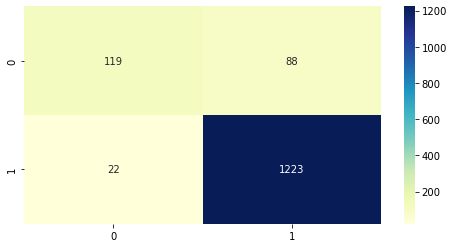

In [43]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

## En sus : TF-IDF est une approche très répandue lorsqu’il s’agit de convertir des phrases en features.

In [44]:
f2 = lambda x: ' '.join(filter(None,(x)))
df["Description_TFIDF"] = df["Description_nlp"].apply(f2)
X2 = df[['Description_TFIDF']]
X2.head(2)

,Description_TFIDF
0,chef oeuvre super héroïque the dark knight chr...
1,fou aime détester christopher nolan…plus films...


In [45]:
y2 = df[['Note']]
y.head(2)

,Note
0,1
1,1


In [46]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state=0)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((5808, 1), (5808, 1), (1452, 1), (1452, 1))

In [47]:
X_train2 = [x for x in X_train2['Description_TFIDF']]
len(X_train2)

5808

In [48]:
X_test2 = [x for x in X_test2['Description_TFIDF']]
len(X_test2)

1452

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
tfidf = TfidfVectorizer(min_df=0.1)
tfidf.fit(X_train2)
feat_train = tfidf.transform(X_train2)
feature_names = tfidf.get_feature_names_out()
dense_train = feat_train.todense()
denselist = dense_train.tolist()
df_train = pd.DataFrame(denselist, columns=feature_names)
df_train

,acteurs,action,aussi,bien,bon,casting,chef,christopher,cinéma,comme,...,spéciaux,tous,tout,trop,très,voir,vraiment,vu,ça,être
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.715059,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.243495,0.000000,0.000000,0.339081,0.000000,0.000000,0.000000,...,0.300715,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.36749,0.511662,0.000000,0.000000,0.000000,0.000000,0.385650,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.379157,0.371426,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.377437,0.000000,0.000000,0.000000,0.000000,0.414221,...,0.000000,0.0,0.000000,0.0,0.326070,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.176956,0.000000,0.00000,0.163830,0.374689,0.244856,0.000000,0.000000,0.246964,0.411205,...,0.202329,0.0,0.159245,0.0,0.000000,0.178363,0.445508,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.446485,0.000000,0.000000,...,0.000000,0.0,0.317746,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5804,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.509796,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.398560,0.000000,0.000000,0.000000,0.000000
5805,0.219476,0.289898,0.00000,0.203196,0.000000,0.000000,0.282962,0.277532,0.000000,0.000000,...,0.250946,0.0,0.395017,0.0,0.200738,0.221221,0.000000,0.000000,0.000000,0.000000
5806,0.000000,0.000000,0.00000,0.190249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.184924,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.263130


In [50]:
feat_train.toarray().shape

(5808, 46)

In [51]:
feat_train.todense().shape

(5808, 46)

In [52]:
feat_test = tfidf.transform(X_test2)
feature_names = tfidf.get_feature_names_out()
dense_test = feat_test.todense()
denselist = dense_test.tolist()
df_test = pd.DataFrame(denselist, columns=feature_names)
df_test.head()

,acteurs,action,aussi,bien,bon,casting,chef,christopher,cinéma,comme,...,spéciaux,tous,tout,trop,très,voir,vraiment,vu,ça,être
0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.314567,0.15836,0.110244,0.000000,0.0,0.0,0.301149,0.332371,0.138353,...,0.0,0.0,0.107158,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.152476
2,0.0,0.000000,0.00000,0.000000,0.276975,0.0,0.0,0.000000,0.000000,0.303968,...,0.0,0.0,0.000000,0.0,0.239280,0.000000,0.329325,0.0,0.0,0.334998
3,0.0,0.000000,0.00000,0.000000,0.305721,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.264115,0.291064,0.363505,0.0,0.0,0.000000
4,0.0,0.000000,0.00000,0.551092,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [53]:
dense_test.shape

(1452, 46)

In [54]:
# redimensionnement des targets pour la régression logistique
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
y_train2.shape, y_test2.shape

((5808,), (1452,))

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Trouve le meilleur hyperparametre c (régularisation)
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c,solver='liblinear', random_state=0, max_iter=150)
    lr.fit(feat_train.toarray(), y_train2)
    y_pred_test2 = lr.predict(feat_test.toarray())
    print ("Précision pour C=%s: %s" % (c, round(accuracy_score(y_test2, y_pred_test2),4)))

Précision pour C=0.01: 0.8574
Précision pour C=0.05: 0.8574
Précision pour C=0.25: 0.8664
Précision pour C=0.5: 0.8705
Précision pour C=1: 0.8733


In [60]:
# Créer votre modèle de régression logistique et entraînez le sur les données d'entraînement
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0, max_iter=15)
# entrainement du model
logreg.fit(feat_train.toarray(), y_train2)
# Predire les résultats du modèle sur l'ensemble du test
y_pred_test2 = logreg.predict(feat_test.toarray())
print(y_pred_test2)
print(y_test2)

[1 1 1 ... 0 1 1]
[1 1 1 ... 1 1 1]


In [61]:
# Afficher l'accuracy score en utilisant la fonction accuracy_score sur le jeu de test
from sklearn.metrics import accuracy_score
print('Model accuracy score: ',accuracy_score(y_test2, y_pred_test2))

Model accuracy score:  0.8732782369146006


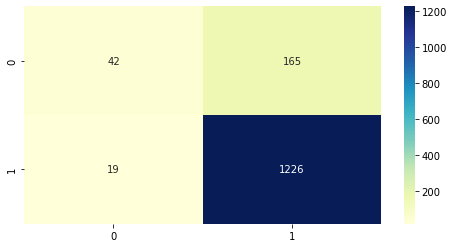

In [62]:
#Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test2)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.show()